In [65]:
import numpy as np
import pandas as pd
import cv2
import random

In [66]:
#loading all the image data
image_data=[]
for i in range(0,1000):
  img_col=[]
  path='/content/drive/MyDrive/Colab Notebooks/charts/charts/train_val/'+str(i)+'.png'#provide the file location
  img=cv2.imread(path)
  image_data.append(img/255)


In [41]:
image_data=np.array(image_data).reshape(-1,128,128,3)

In [42]:
image_data.shape

(1000, 128, 128, 3)

In [67]:
#loading all the labels
label=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/charts/charts/train_val.csv')#provide the file location

In [68]:
label_data_df=pd.get_dummies(label['type'])#converting the string labels into numric classes

In [69]:
label_names=label_data_df.columns#stroring label strings

In [70]:
label_data=label_data_df.values.tolist()#converting label data into a list

In [71]:
#storing the features and labels in a list to shufffle them for mixing up the data
dataset=[]
for i in range(0,1000):
  dataset.append([image_data[i],label_data[i]])
  

In [72]:
#shuffling up the data using random
random.shuffle(dataset)

In [49]:
#differentiating traing features and labels
x_train=[]
y_train=[]
for i in range(0,1000):
  x_train.append(dataset[i][0])
  y_train.append(dataset[i][1])
x_train=np.array(x_train).reshape(-1,128,128,3)#converting into numpy array tomake sure that the shape is correct for the model
y_train=np.array(y_train)

In [50]:
from tensorflow import keras

In [53]:
#model with two CNN layer and one dense layer
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64,strides=1,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=1))

model.add(keras.layers.Conv2D(filters=64,strides=1,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=1))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
model.fit(x_train,y_train,epochs=10,batch_size=10,shuffle=True,validation_split=0.2)

Epoch 1/10
80/80 [==============================] - 143s 2s/step - loss: 3.5309 - accuracy: 0.6513 - val_loss: 0.2361 - val_accuracy: 0.9050
Epoch 2/10
80/80 [==============================] - 144s 2s/step - loss: 0.1572 - accuracy: 0.9500 - val_loss: 0.1444 - val_accuracy: 0.9450
Epoch 3/10
80/80 [==============================] - 145s 2s/step - loss: 0.0951 - accuracy: 0.9688 - val_loss: 0.1162 - val_accuracy: 0.9500
Epoch 4/10
80/80 [==============================] - 145s 2s/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0600 - val_accuracy: 0.9700
Epoch 5/10
80/80 [==============================] - 144s 2s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0795 - val_accuracy: 0.9650
Epoch 6/10
80/80 [==============================] - 146s 2s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9700
Epoch 7/10
80/80 [==============================] - 143s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9700
Epoch 8/10
80

In [55]:
losses=pd.DataFrame(model.history.history)

In [57]:
from matplotlib import pyplot as plt

<Axes: >

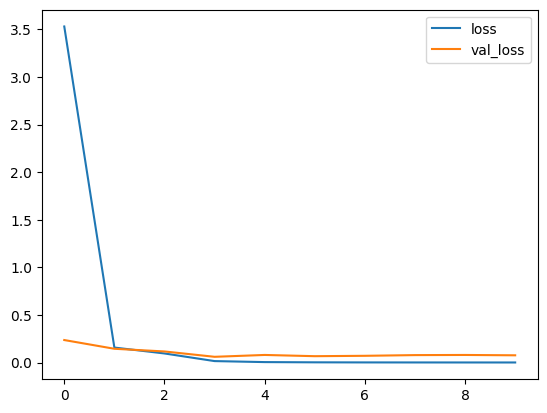

In [58]:

losses[['loss','val_loss']].plot()

<Axes: >

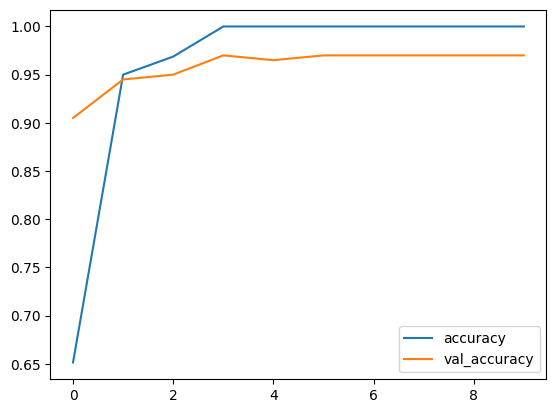

In [59]:
losses[['accuracy','val_accuracy']].plot()

In [60]:
test_data=[]
for i in range(0,50):
  img_col=[]
  path='/content/drive/MyDrive/Colab Notebooks/charts/charts/test/'+str(i)+'.png'
  img=cv2.imread(path)
  test_data.append(img)
test_data=np.array(test_data).reshape(-1,128,128,3)

In [61]:
pred=model.predict(test_data)
predictions=[]
for p in pred:
  predictions.append(label_names[list(p).index(max(p))])




2/2 [==============================] - 2s 578ms/step


In [62]:
for i in range(50):
  print(i,"====>",predictions[i])

0 ====> vbar_categorical
1 ====> hbar_categorical
2 ====> vbar_categorical
3 ====> hbar_categorical
4 ====> line
5 ====> line
6 ====> vbar_categorical
7 ====> vbar_categorical
8 ====> line
9 ====> line
10 ====> dot_line
11 ====> hbar_categorical
12 ====> line
13 ====> line
14 ====> pie
15 ====> line
16 ====> hbar_categorical
17 ====> vbar_categorical
18 ====> dot_line
19 ====> hbar_categorical
20 ====> dot_line
21 ====> pie
22 ====> line
23 ====> pie
24 ====> vbar_categorical
25 ====> hbar_categorical
26 ====> hbar_categorical
27 ====> dot_line
28 ====> pie
29 ====> pie
30 ====> hbar_categorical
31 ====> line
32 ====> vbar_categorical
33 ====> hbar_categorical
34 ====> hbar_categorical
35 ====> line
36 ====> vbar_categorical
37 ====> dot_line
38 ====> vbar_categorical
39 ====> dot_line
40 ====> dot_line
41 ====> vbar_categorical
42 ====> pie
43 ====> hbar_categorical
44 ====> pie
45 ====> hbar_categorical
46 ====> line
47 ====> pie
48 ====> pie
49 ====> line


In [63]:
#alexNet for image classification on our dataset
alex_net=keras.models.Sequential()

alex_net.add(keras.layers.Conv2D(filters=96,strides=4,kernel_size=(11,11),activation='relu',input_shape=(128,128,3)))
alex_net.add(keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

alex_net.add(keras.layers.Conv2D(filters=256,padding='same',kernel_size=(5,5),activation='relu'))
alex_net.add(keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

alex_net.add(keras.layers.Conv2D(filters=384,padding='same',kernel_size=(3,3),activation='relu'))
alex_net.add(keras.layers.Conv2D(filters=384,padding='same',kernel_size=(3,3),activation='relu'))
alex_net.add(keras.layers.Conv2D(filters=384,padding='same',kernel_size=(3,3),activation='relu'))
alex_net.add(keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

alex_net.add(keras.layers.Flatten())

alex_net.add(keras.layers.Dense(4096,activation='softmax'))

alex_net.add(keras.layers.Dense(4096,activation='softmax'))

alex_net.add(keras.layers.Dense(5,activation='softmax'))
alex_net.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [64]:
alex_net.fit(x_train,y_train,epochs=10,batch_size=10,shuffle=True,validation_split=0.2)

Epoch 1/10
80/80 [==============================] - 74s 901ms/step - loss: 1.6098 - accuracy: 0.1912 - val_loss: 1.6100 - val_accuracy: 0.1750
Epoch 2/10
80/80 [==============================] - 72s 900ms/step - loss: 1.6097 - accuracy: 0.1937 - val_loss: 1.6108 - val_accuracy: 0.1700
Epoch 3/10
80/80 [==============================] - 74s 926ms/step - loss: 1.6097 - accuracy: 0.1950 - val_loss: 1.6111 - val_accuracy: 0.1700
Epoch 4/10
80/80 [==============================] - 74s 920ms/step - loss: 1.6095 - accuracy: 0.1900 - val_loss: 1.6120 - val_accuracy: 0.1700
Epoch 5/10
80/80 [==============================] - 72s 903ms/step - loss: 1.6095 - accuracy: 0.1937 - val_loss: 1.6122 - val_accuracy: 0.1700
Epoch 6/10
80/80 [==============================] - 72s 909ms/step - loss: 1.6094 - accuracy: 0.1887 - val_loss: 1.6123 - val_accuracy: 0.1700
Epoch 7/10
80/80 [==============================] - 76s 953ms/step - loss: 1.6095 - accuracy: 0.1988 - val_loss: 1.6128 - val_accuracy: 0.1700